In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
#red = pd.read_csv("D:/python3/data/winequality-red.csv")

red = pd.read_csv("D:/python3/data/Star39552_balanced.csv")

In [24]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
Vmag           39552 non-null float64
Plx            39552 non-null float64
e_Plx          39552 non-null float64
B-V            39552 non-null float64
SpType         39552 non-null object
Amag           39552 non-null float64
TargetClass    39552 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [25]:
red['TargetClass'].value_counts()
red.shape
X = red[red.columns.difference(['SpType'])]

In [26]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 데이터 로딩
#X_data = red[red.columns[:-1]].values
X_data = X.values
y_data = red['TargetClass'].values

# train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state = 42)

In [27]:
from tensorflow import keras
train_scaled, val_scaled, train_target, val_target = train_test_split(X_train, y_train,
                                                                     test_size = 0.2, random_state = 42)

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'softmax', input_dim = 6))

In [28]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              #loss = 'MAE',
              metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

In [29]:
history = model.fit(train_scaled, train_target, epochs= 100, batch_size = 32,
                    callbacks= [checkpoint_cb, early_stopping_cb],
                    validation_data=(val_scaled, val_target))

Train on 25312 samples, validate on 6329 samples
Epoch 1/100
25312/25312 [==============================] - 1s 47us/sample - loss: 1.6672 - accuracy: 0.7478 - val_loss: 0.3167 - val_accuracy: 0.9817
Epoch 2/100
25312/25312 [==============================] - 1s 38us/sample - loss: 0.2359 - accuracy: 0.9876 - val_loss: 0.1799 - val_accuracy: 0.9916
Epoch 3/100
25312/25312 [==============================] - 1s 37us/sample - loss: 0.1429 - accuracy: 0.9948 - val_loss: 0.1171 - val_accuracy: 0.9948
Epoch 4/100
25312/25312 [==============================] - 1s 38us/sample - loss: 0.0956 - accuracy: 0.9981 - val_loss: 0.0810 - val_accuracy: 0.9967
Epoch 5/100
25312/25312 [==============================] - 1s 45us/sample - loss: 0.0667 - accuracy: 0.9990 - val_loss: 0.0574 - val_accuracy: 0.9989
Epoch 6/100
25312/25312 [==============================] - 1s 41us/sample - loss: 0.0475 - accuracy: 0.9993 - val_loss: 0.0413 - val_accuracy: 0.9991
Epoch 7/100
25312/25312 [==========================

In [30]:
model.evaluate(X_test, y_test, verbose=0)

[1.1678262424345356e-08, 1.0]

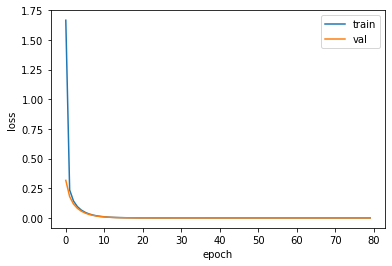

In [31]:
# 훈련소실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

SVM test accuracy: 0.4850
SVM test accuracy: 0.5375
SVM test accuracy: 0.5575
SVM test accuracy: 0.5875
SVM test accuracy: 0.5900
SVM test accuracy: 0.6050
SVM test accuracy: 0.5925


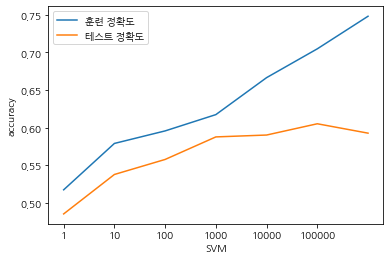

In [41]:
X = red[red.columns[:-1]].values
y = red['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

training_accuracy = []
test_accuracy = []
setting = range(7)
for c in setting:
    penalty=10**c
    
    svm = SVC(C=penalty)
    # learning an SVM on the scaled training data
    svm.fit(X_train, y_train)
       
    # 훈련데이터 정확도
    training_accuracy.append(svm.score(X_train, y_train))
    # 일반화 정확도
    test_accuracy.append(svm.score(X_test, y_test))
    print("SVM test accuracy: {:.4f}".format(svm.score(X_test, y_test)))
  
plt.plot(setting, training_accuracy, label="훈련 정확도")
plt.plot(setting, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xticks(range(6), [10**c for c in range(6)])
plt.xlabel('SVM')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [34]:
# 시각화 한글 처리
import matplotlib as mpl

# 폰트 설정
mpl.rc('font', family = 'NanumGothic')

# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X = red[red.columns[:-1]].values
y = red['TargetClass'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

training_accuracy = []
test_accuracy = []
setting = range(6)
for c in setting:
    penalty=10**c
    
    svm = SVC(C=penalty, kernel = "rbf", gamma = 0.7)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # learning an SVM on the scaled training data
    svm.fit(X_train_scaled, y_train)
    pred = svm.predict(X_test_scaled)
    
    # 훈련데이터 정확도
    training_accuracy.append(svm.score(X_train_scaled, y_train))
    # 일반화 정확도
    test_accuracy.append(svm.score(X_test_scaled, y_test))
    print("SVM test accuracy: {:.4f}".format(svm.score(X_test_scaled, y_test)))
  
plt.plot(setting, training_accuracy, label="훈련 정확도")
plt.plot(setting, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xticks(range(6), [10**c for c in range(6)])
plt.xlabel('SVM')
plt.ylabel('accuracy')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'B9V'

In [66]:
from sklearn.model_selection import GridSearchCV
X = red[red.columns[:-1]].values
y = red['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


parameters = [ { 'C' : [ 1, 10, 100, 1000 ] , 'kernel': [ 'linear' ]},
               { 'C' : [ 1, 10, 100, 1000 ], 'kernel': [ 'rbf' ], 'gamma' : [ 10, 1, 0.1,0.7,0.01,0.001 ]} ]

grid_search = GridSearchCV ( estimator = SVC, param_grid = parameters, cv = 10 )

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search. best_score_

best_parameters = grid_search. best_params_


TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.